In [98]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [99]:
bank=pd.read_csv("bank-full.csv",sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [100]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [101]:
#to sell all the cols
pd.set_option("display.max.columns",None)
bank

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [102]:
bank1=bank.drop(['job','marital','education','contact','poutcome'],axis=1)
bank1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,no,2143,yes,no,5,may,261,1,-1,0,no
1,44,no,29,yes,no,5,may,151,1,-1,0,no
2,33,no,2,yes,yes,5,may,76,1,-1,0,no
3,47,no,1506,yes,no,5,may,92,1,-1,0,no
4,33,no,1,no,no,5,may,198,1,-1,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,no,825,no,no,17,nov,977,3,-1,0,yes
45207,71,no,1729,no,no,17,nov,456,2,-1,0,yes
45208,72,no,5715,no,no,17,nov,1127,5,184,3,yes
45209,57,no,668,no,no,17,nov,508,4,-1,0,no


In [103]:
bank1["default"]=np.where(bank1["default"].str.contains("yes") , 1 , 0)
bank1["housing"]=np.where(bank1["housing"].str.contains("yes") , 1 , 0)
bank1["loan"]=np.where(bank1["loan"].str.contains("yes"), 1 , 0)
bank1["y"]=np.where(bank1["y"].str.contains("yes") , 1 , 0)
bank1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,may,261,1,-1,0,0
1,44,0,29,1,0,5,may,151,1,-1,0,0
2,33,0,2,1,1,5,may,76,1,-1,0,0
3,47,0,1506,1,0,5,may,92,1,-1,0,0
4,33,0,1,0,0,5,may,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,nov,977,3,-1,0,1
45207,71,0,1729,0,0,17,nov,456,2,-1,0,1
45208,72,0,5715,0,0,17,nov,1127,5,184,3,1
45209,57,0,668,0,0,17,nov,508,4,-1,0,0


In [104]:
bank1["month"].value_counts()

may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64

In [105]:
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
bank1=bank1.replace(order)

In [106]:
bank1

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58,0,2143,1,0,5,5,261,1,-1,0,0
1,44,0,29,1,0,5,5,151,1,-1,0,0
2,33,0,2,1,1,5,5,76,1,-1,0,0
3,47,0,1506,1,0,5,5,92,1,-1,0,0
4,33,0,1,0,0,5,5,198,1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,0,1
45207,71,0,1729,0,0,17,11,456,2,-1,0,1
45208,72,0,5715,0,0,17,11,1127,5,184,3,1
45209,57,0,668,0,0,17,11,508,4,-1,0,0


In [107]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   age       45211 non-null  int64
 1   default   45211 non-null  int32
 2   balance   45211 non-null  int64
 3   housing   45211 non-null  int32
 4   loan      45211 non-null  int32
 5   day       45211 non-null  int64
 6   month     45211 non-null  int64
 7   duration  45211 non-null  int64
 8   campaign  45211 non-null  int64
 9   pdays     45211 non-null  int64
 10  previous  45211 non-null  int64
 11  y         45211 non-null  int32
dtypes: int32(4), int64(8)
memory usage: 3.4 MB


In [108]:
x=bank1.iloc[:,1:]
y=bank1.iloc[:,11]
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 45211, dtype: int32


In [109]:
classifier=LogisticRegression()
classifier.fit(x,y)

LogisticRegression()

In [110]:
y_pred=classifier.predict(x)
y_pred

array([0, 0, 0, ..., 1, 0, 0])

In [111]:
y_pred_df=pd.DataFrame({'actual_y':y ,"y_pred":y_pred})
y_pred_df

,actual_y,y_pred
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,1
45208,1,1
45209,0,0


In [112]:
from sklearn.metrics import confusion_matrix
confusion_matrix=confusion_matrix(y,y_pred)
confusion_matrix

array([[39766,   156],
       [  731,  4558]], dtype=int64)

In [113]:
(39766+4558)/(39766+156+731+4558)*100

98.03808807591074

In [114]:
classifier.predict_proba(x)[:,1]

array([6.24823410e-03, 4.46826200e-03, 1.57562492e-03, ...,
       8.85901275e-01, 8.00388876e-03, 2.70405700e-05])

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99     39922
           1       0.97      0.86      0.91      5289

    accuracy                           0.98     45211
   macro avg       0.97      0.93      0.95     45211
weighted avg       0.98      0.98      0.98     45211



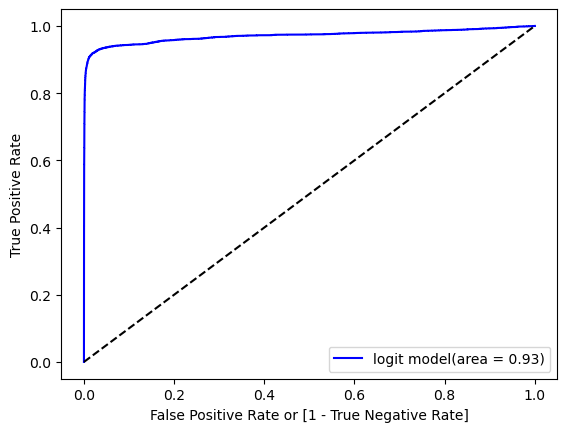

In [116]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds =roc_curve(y,classifier.predict_proba(x)[:,1])
auc=roc_auc_score(y,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='blue', label='logit model(area = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [117]:
auc

0.9289404990137271